### [실습] 배깅(bagging, bootstrap aggregating)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [5]:
iris = load_iris()
X, y = iris.data[:, [0,2]], iris.target

model1 = DecisionTreeClassifier(max_depth =10, random_state=0).fit(X, y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=50, random_state=0).fit(X, y)

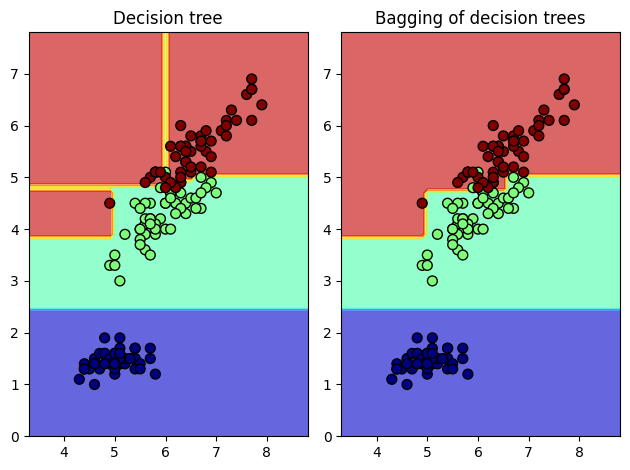

In [6]:
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:,0], X[:,1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("Decision tree")
plt.subplot(122)

Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:,0], X[:,1],c=y,alpha=1,s=50,cmap=mpl.cm.jet,edgecolors="k")
plt.title("Bagging of decision trees")
plt.tight_layout()
plt.show()

### [실습] 랜덤 포리스트 (random forest)

In [7]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [8]:
iris = datasets.load_iris()
print('Class names :', iris.target_names)
print('target : [0:setosa, 1:versicolor, 2:virginical]')
print('No. of Data :', len(iris.data))
print('Featrue names :', iris.feature_names)

data = pd.DataFrame({
    'sepal length': iris.data[:,0], 'sepal width': iris.data[:,1], 'petal length': iris.data[:,2],
    'petal width':iris.data[:,3], 'species':iris.target
})
print(data.head()) # 일부 데이터 출력

x = data[['sepal length', 'sepal width', 'petal length', 'petal width']] # 입력
y = data['species'] # 출력
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 테스트 데이터 30%
print('No. of traing data: ', len(x_train))
print('No. of test data:', len(y_test))

forest = RandomForestClassifier(n_estimators=100) # 모델 생성
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test) # 추론 (예측)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))

Class names : ['setosa' 'versicolor' 'virginica']
target : [0:setosa, 1:versicolor, 2:virginical]
No. of Data : 150
Featrue names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
No. of traing data:  105
No. of test data: 45
Accuracy : 0.9333333333333333


### [실습] 배깅 회귀 (Bagging Regression)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston # scikit-leanr < 1.2
# from sklearn.datasets import fetch_california_housing # replace dataset
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [2]:
boston = load_boston() # < 1.2
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
print(data.head())

# replace dataset
# california = fetch_california_housing()
# data = pd.DataFrame(california.data)
# data.columns = california.feature_names
# data['PRICE'] = california.target
# print(data.head())

X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
bag = BaggingRegressor(base_estimator = DecisionTreeRegressor( ), n_estimators = 10,
max_features=1.0, bootstrap_features=False, random_state=0)
bag.fit(X_train,y_train)
preds = bag.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
RMSE: 4.594919


C:\Users\pinb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

### [실습] AdaBoost - 회귀

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

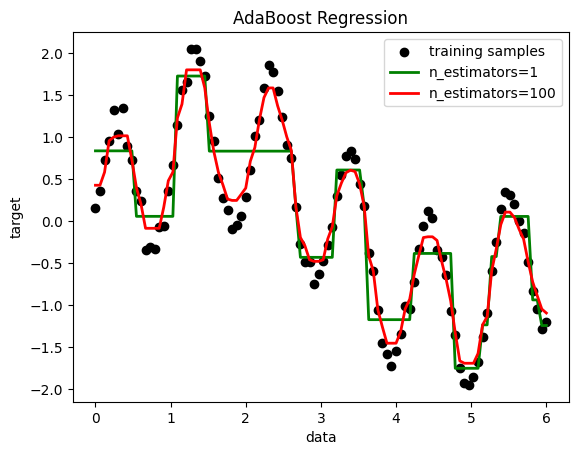

In [4]:
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6*X).ravel() + rng.normal(0, 0.1, X.shape[0])

regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=100", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("AdaBoost Regression")
plt.legend()
plt.show()

### [실습] Gradient Boosting 기반 회귀

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [8]:
boston = datasets.load_boston() # Boston 집값 데이터, 13개 속성, 마지막 중간값 정보
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

data = pd.DataFrame(boston.data, columns=boston.feature_names)
data = pd.concat([data, pd.Series(boston.target, name='MEDV')], axis=1)
print(data.head())
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


C:\Users\pinb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

C:\Users\pinb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


R2 sq:  0.9800347273281852
Mean squared error: 5.88
Test Variance score: 0.91


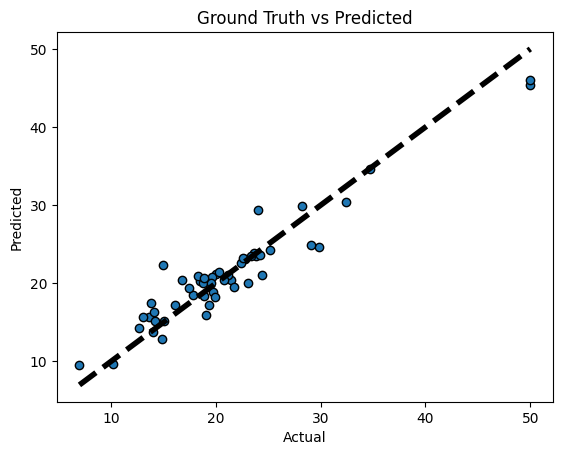

In [10]:
params = {'n_estimators':500, 'max_depth':4, 'min_samples_split':2, 'learning_rate':0.01, 'loss':'ls'}
model = ensemble.GradientBoostingRegressor(**params)
model.fit(x_training_set, y_training_set)
model_score = model.score(x_training_set, y_training_set)
print('R2 sq: ', model_score)

y_predicted = model.predict(x_test_set)
print('Mean squared error: %.2f'% mean_squared_error(y_test_set, y_predicted))
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0,0,0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Ground Truth vs Predicted')
plt.show()

### [실습] Gradient Boosting 기반 분류

In [11]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [14]:
X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]
print(X.shape, y.shape)
print(X[0:5,:])
print(y[0:5])

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
print('Accuracy score (training): {0:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy score (testing): {0:.3f}'.format(clf.score(X_test, y_test)))

(12000, 10) (12000,)
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323  0.33367433
   1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
   0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218 -0.4380743
  -1.25279536  0.77749036 -1.61389785 -0.21274028]]
[ 1. -1.  1. -1.  1.]
Accuracy score (training): 0.879
Accuracy score (testing): 0.819


### [실습] XGBoosting 기반 회귀

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [19]:
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
print(data.head())
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE: %f' % (rmse))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
RMSE: 10.423243


C:\Users\pinb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

### [실습] LightGBM

In [1]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

C:\Users\pinb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\pinb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

<Axes: >

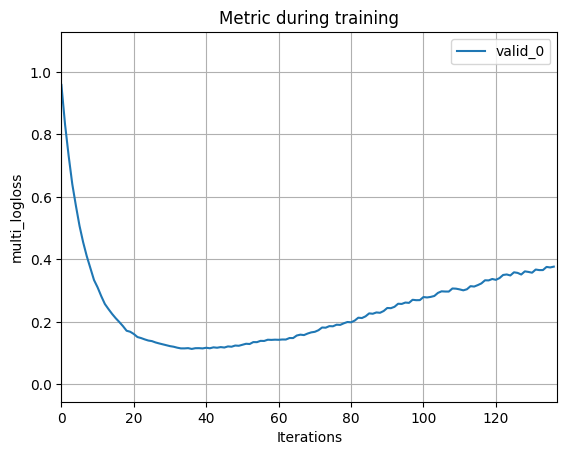

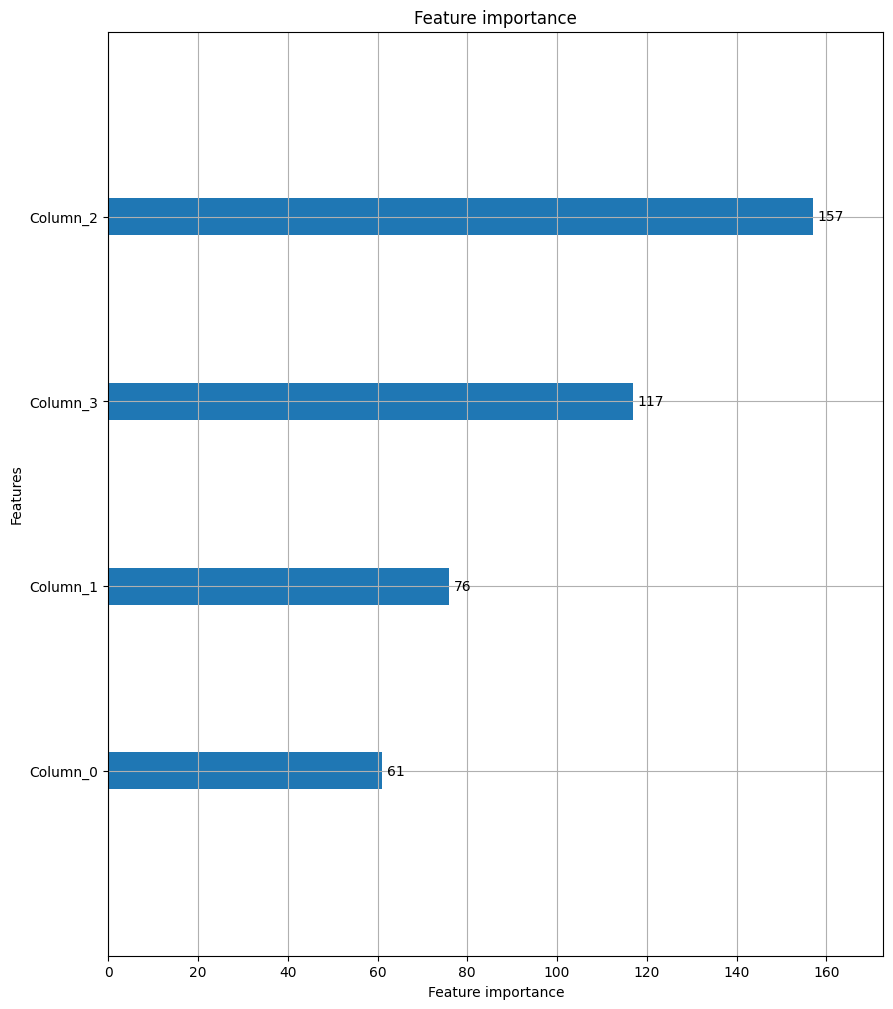

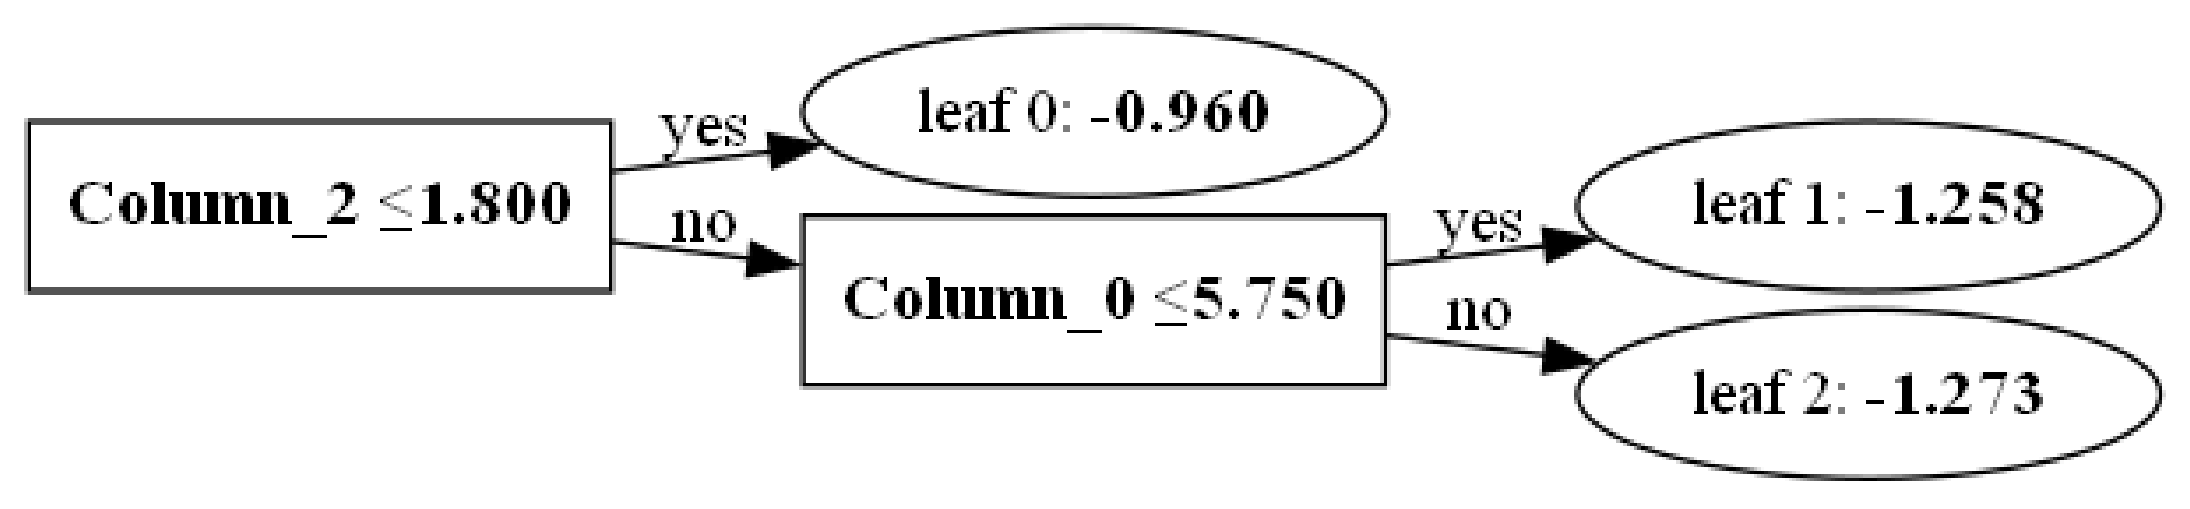

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbmc.predict(X_test)

cross_val = cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg fit time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg fit time: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

plot_metric(lgbmc)
plot_importance(lgbmc, figsize=(10,12))
plot_tree(lgbmc, figsize=(28,14))